칼럼 분석 및 시각화

칼럼 ['name','platform','release_date','meta_score','user_review']

In [103]:
import warnings
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import mplcursors # Use this is for creating a cursor-interactive plot with "%matplotlib notebook"
from sklearn.decomposition import NMF # Use this for training Non-negative Matrix Factorization
from sklearn.utils.extmath import randomized_svd # Use this for training Singular Value Decomposition
from sklearn.manifold import TSNE # Use this for training t-sne manifolding

plt.style.use('ggplot') # You can also use different style

# just for plot checking, use this option
# %matplotlib inline

# for interactive plot
# If you use this option, plot will appear at first-drawn position
%matplotlib notebook

warnings.filterwarnings('ignore')

전처리된 데이터셋 불러오기

In [104]:
dir = './dataset/'
df_games=pd.read_csv(dir+'all_games_proc.csv')

platform 기준으로 meta_score user_review평균내보기

<IPython.core.display.Javascript object>


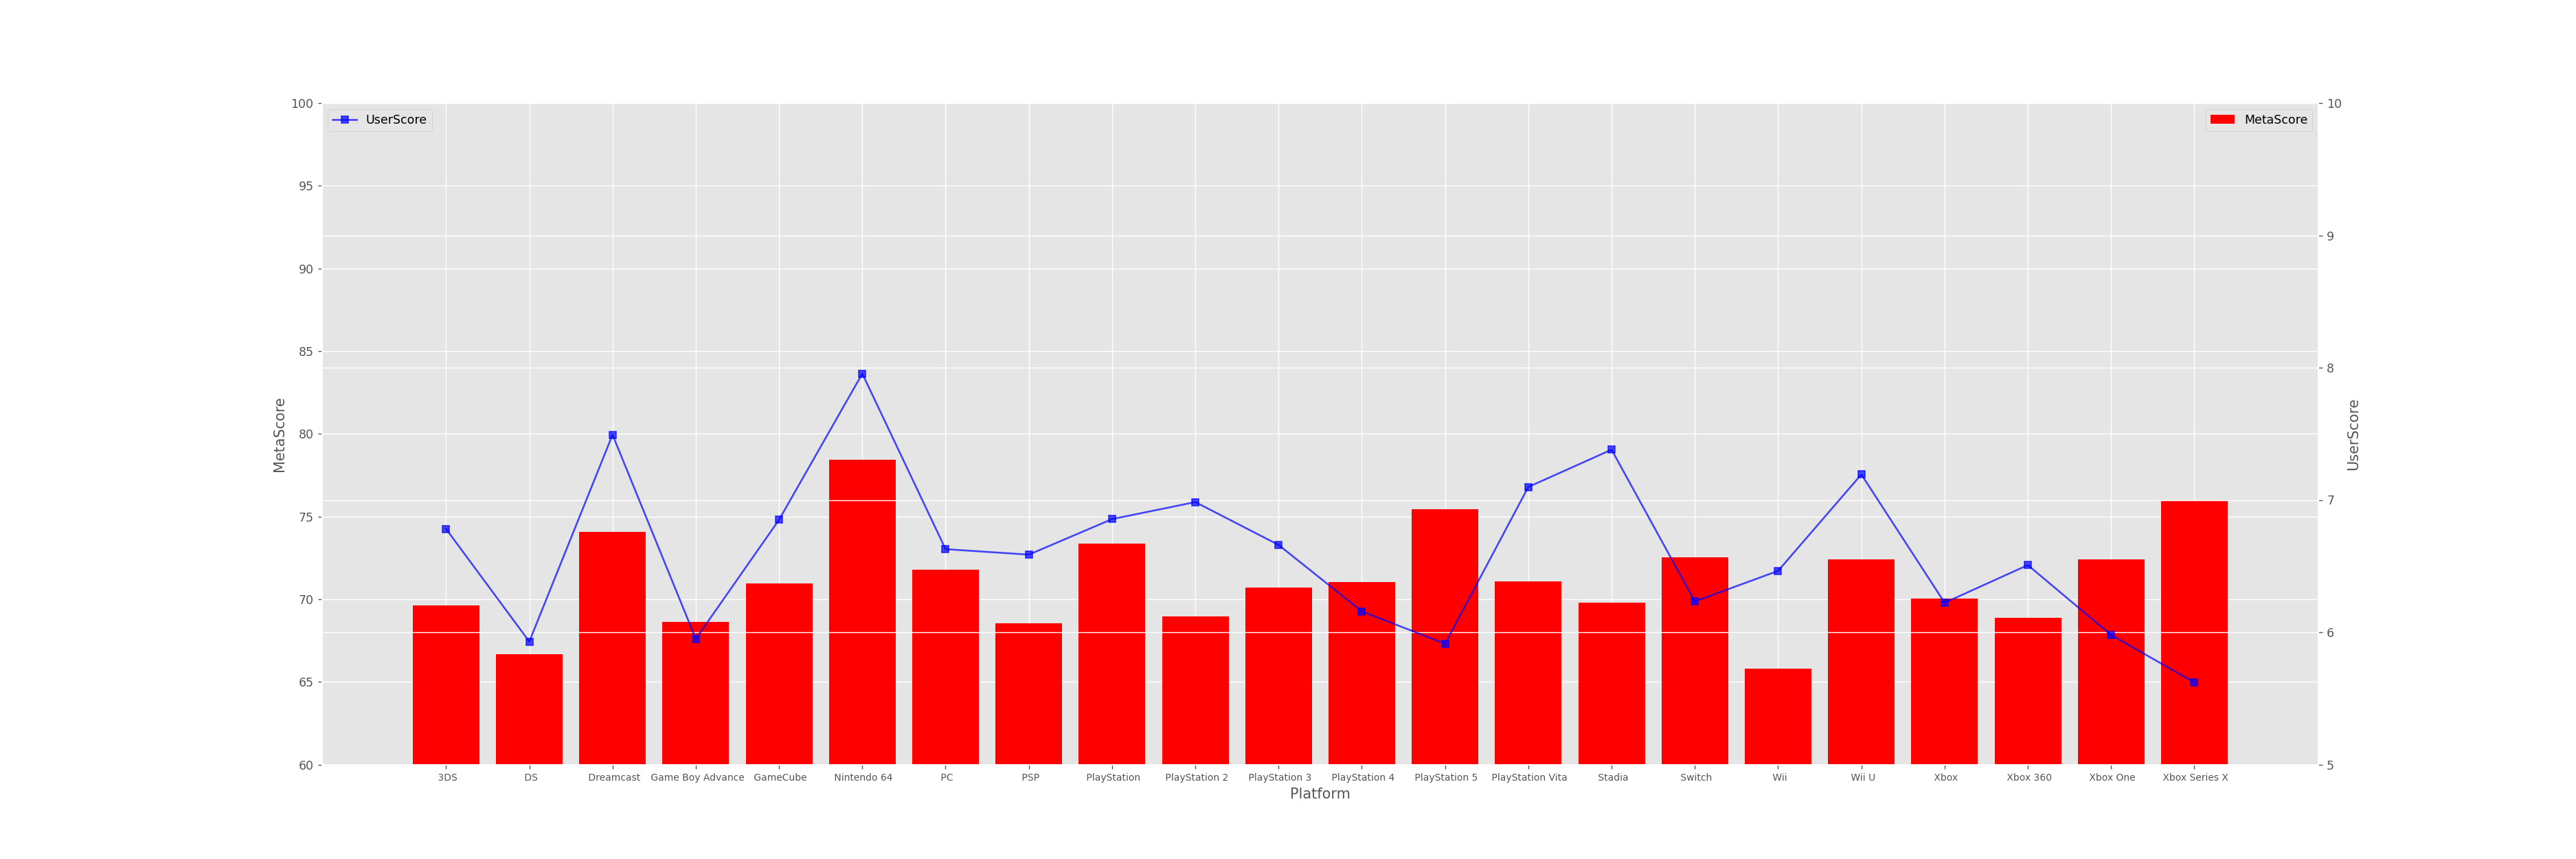

In [105]:
df_games_platform_mean=df_games.groupby(['platform']).mean()
xs=df_games_platform_mean.index.to_list() #플롯할 데이터 모두 list로 저장
ys_meta=df_games_platform_mean['meta_score'].to_list() 
ys_user=df_games_platform_mean['user_review'].to_list() 
ax_user,ax_meta=plt.subplots(figsize=(30,10))
ax_meta.bar(xs,ys_meta,color='red',label='MetaScore')
ax_meta.set_ylim(60,100) #y축 최대, 최소값 
ax_meta.set_xlabel('Platform') #x축 이름 
ax_meta.set_ylabel('MetaScore') #y축 이름 
ax_meta.tick_params(axis='x',labelsize=8)
ax_meta.legend(loc='upper right')#범례 표시 
ax_user=ax_meta.twinx()
ax_user.set_ylabel('UserScore')
ax_user.set_ylim(5,10)
ax_user.plot(xs, ys_user,'-s', color='blue', label='UserScore',alpha=0.7) #xy데이터 플롯-bar 
ax_user.legend(loc='upper left') #범례 표시
plt.savefig('플랫폼별 평균 그래프.png')

연도별로 metascore user_review 평균내보기

<IPython.core.display.Javascript object>


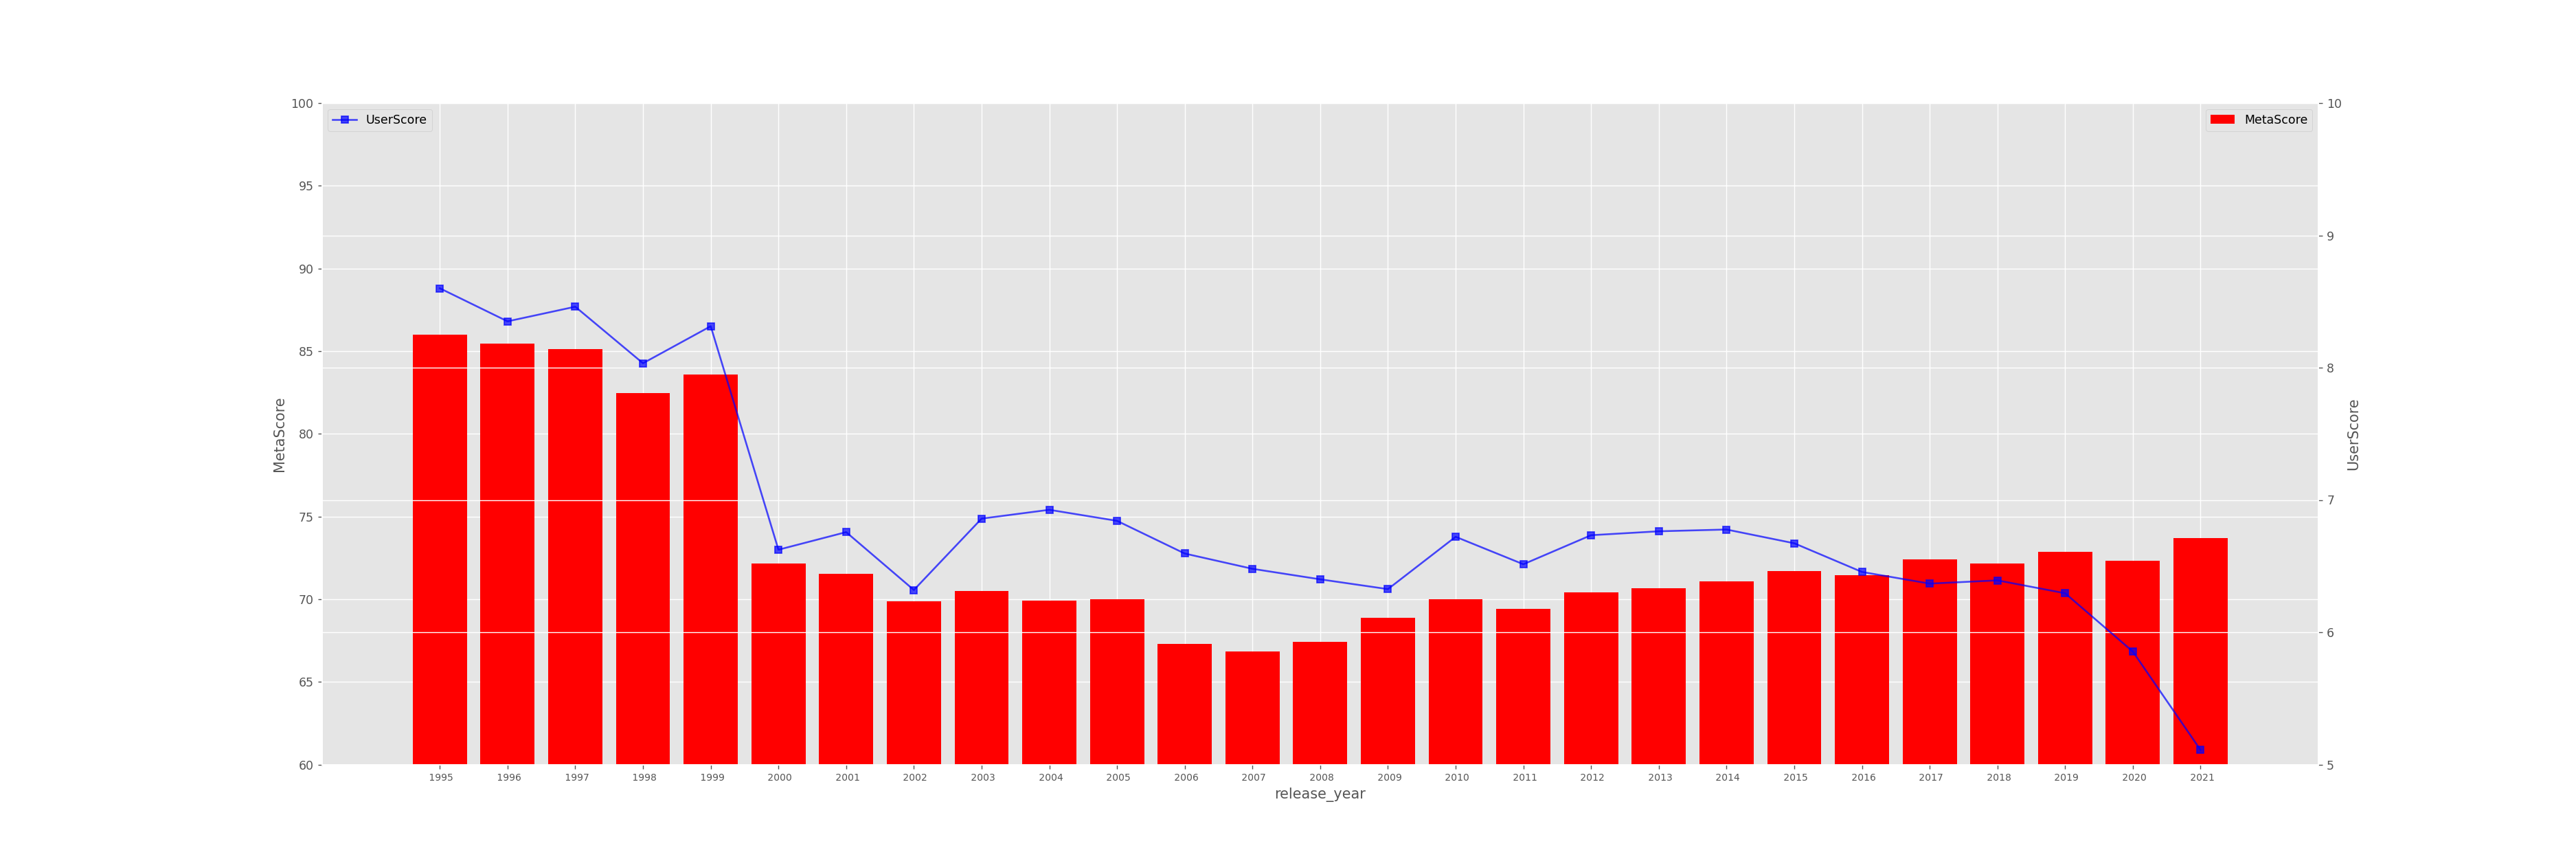

In [107]:
temp_df=df_games.copy()
temp_df["release_date"]=temp_df["release_date"].apply(lambda x : x[-5:])
df_games_platform_mean=temp_df.groupby(['release_date']).mean()
xs=df_games_platform_mean.index.to_list() #플롯할 데이터 모두 list로 저장
ys_meta=df_games_platform_mean['meta_score'].to_list() 
ys_user=df_games_platform_mean['user_review'].to_list() 
ax_user,ax_meta=plt.subplots(figsize=(30,10))
ax_meta.bar(xs,ys_meta,color='red',label='MetaScore')
ax_meta.set_ylim(60,100) #y축 최대, 최소값 
ax_meta.set_xlabel('release_year') #x축 이름 
ax_meta.set_ylabel('MetaScore') #y축 이름 
ax_meta.tick_params(axis='x',labelsize=8)
ax_meta.legend(loc='upper right')#범례 표시 
ax_user=ax_meta.twinx()
ax_user.set_ylabel('UserScore')
ax_user.set_ylim(5,10)
ax_user.plot(xs, ys_user,'-s', color='blue', label='UserScore',alpha=0.7) #xy데이터 플롯-bar 
ax_user.legend(loc='upper left') #범례 표시
plt.savefig('연도별 평균 그래프.png')